<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/Denoising_an_Image_using_Mean_and_Median_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import numpy as np
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

In [9]:
## original image
img = cv2.imread('lenna.png', 0)
img = img/img.max() # normalize the pixel value (0~1)

In [10]:
## noise image
# Salt and Pepper Noise
x,y = img.shape
g = np.zeros((x,y), dtype=np.float32)
pepper = 0.1
salt = 0.9
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = img[i][j]

img_noise = g

Text(0.5, 1.0, 'Original Image')

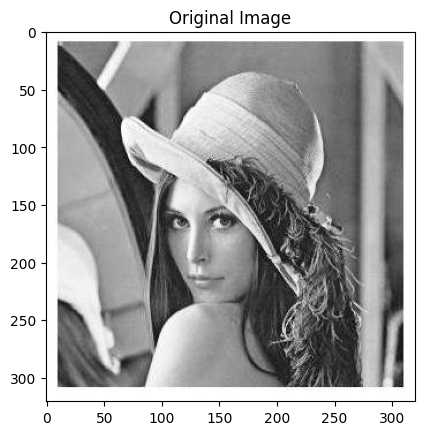

In [11]:
# preview the images
# Creating separate figures to display each image
plt.figure(1) # creating figure 1
plt.imshow(img, cmap='gray') # img is the data to be displayed, cmap is set to 'gray' for grayscale images
plt.title('Original Image') # setting title for figure 1

Text(0.5, 1.0, 'Image + Noise')

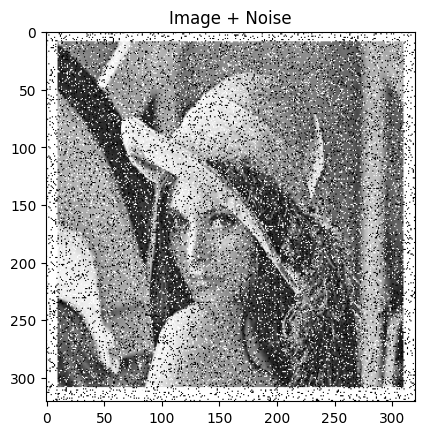

In [12]:
plt.figure(2) # creating figure 2
plt.imshow(img_noise, cmap='gray') # img_noise is the data to be displayed, cmap is set to 'gray'
plt.title('Image + Noise') # setting title for figure 2

In [13]:
## denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(img_noise, (m,n))

# median filter
img_noise_median = np.clip(img_noise, -1, 1) #pixel value range
img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 5)

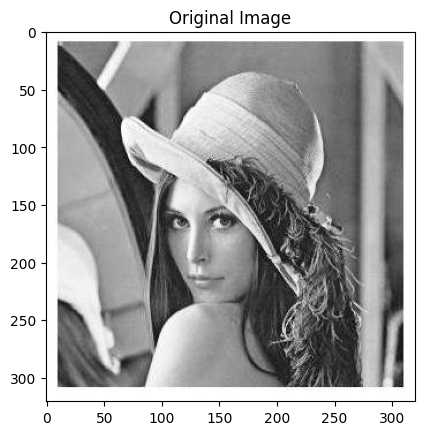

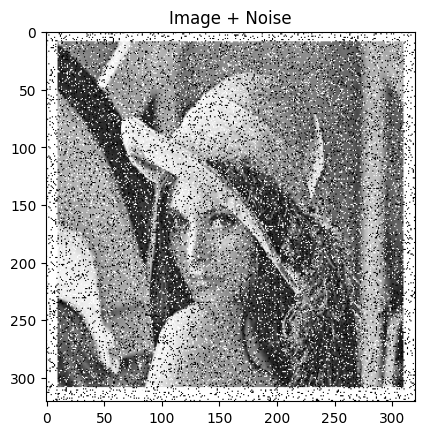

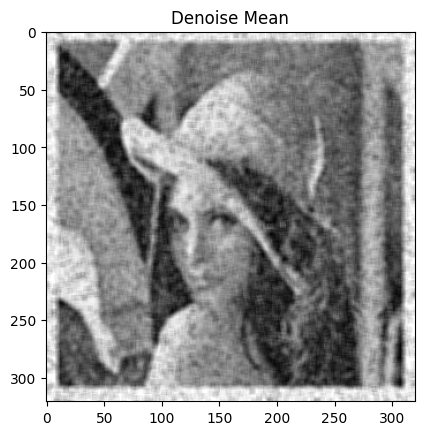

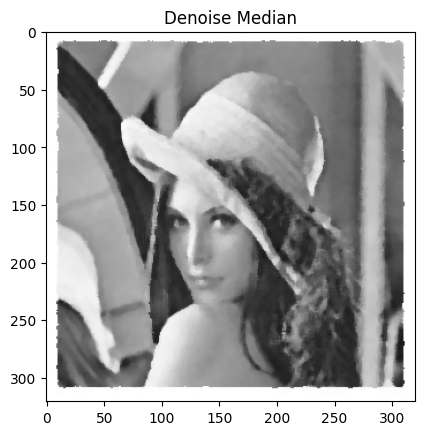

In [14]:
# preview the images
plt.figure(3) # creating figure 3
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.figure(4) # creating figure 4
plt.imshow(img_noise, cmap='gray')
plt.title('Image + Noise')

plt.figure(5) # creating figure 5
plt.imshow(denoise_mean, cmap='gray')
plt.title('Denoise Mean')

plt.figure(6) # creating figure 6
plt.imshow(denoise_median, cmap='gray')
plt.title('Denoise Median')

plt.show() # displaying all figures

# (optional) save the result
plt.imsave('Denoise mean.jpg', img_as_ubyte(denoise_mean), cmap='gray')
plt.imsave('Denoise median.jpg', img_as_ubyte(denoise_median), cmap='gray')